In [1]:
import Pkg; Pkg.status()

Status `~/.julia/environments/v1.10/Project.toml`
  [7073ff75] IJulia v1.24.2
  [2b0e0bc5] LanguageServer v4.5.1
  [2edaba10] Nemo v0.45.5
  [91a5bcdd] Plots v1.40.4
  [17f5de1a] PyQDecoders v0.2.1
  [6099a3de] PythonCall v0.9.20
  [b0d11df0] Quantikz v1.3.1
  [0525e862] QuantumClifford v0.9.4 `../../../Documents/Repos/QuantumClifford.jl`
  [295af30f] Revise v3.5.14
  [37e2e46d] LinearAlgebra


In [2]:
using QuantumClifford, QuantumClifford.ECC
using PyQDecoders

In [3]:
using Quantikz

In [4]:
import PyQDecoders

In [5]:
# methods(RandomCircuitCode)

# All-to-all connection

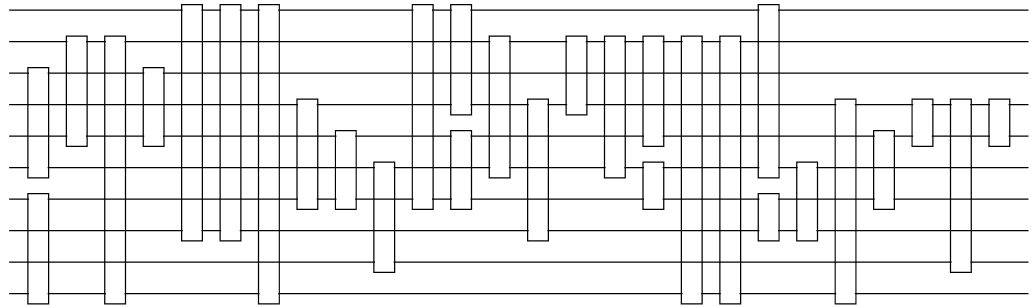

In [6]:
c1 = RandomCircuitCode(10, Val(:alltoall), 30, 2)
c1.circ

In [7]:
c1 |> parity_checks

+ __Z_______
+ YX___ZZ_YY
- ZX___X_XY_
- ___YZXXYZZ
- ZZ___ZX_YZ
+ _Y_ZZZ_X_X
- ____YXXYXZ
- XX__YXYXZY

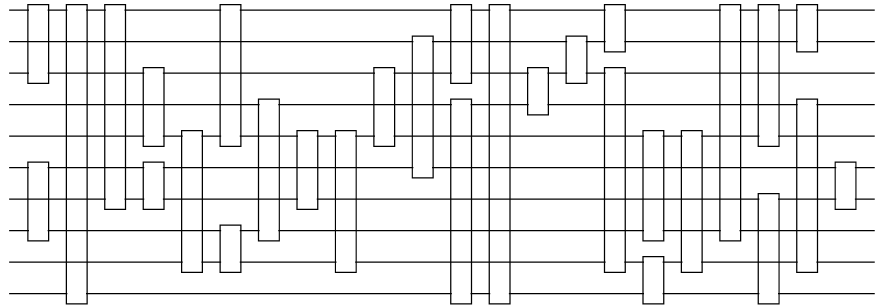

In [8]:
c2 = RandomCircuitCode(10, Val(:alltoall), 30, 1:2:7)
c2.circ

In [9]:
c2 |> parity_checks

+ __YZ__Y_ZY
+ Y_YY_Y_YXY
+ YYX_Z_XYXX
- ZXZYXY_XZ_
- Z_ZX_ZZYXY
+ Z_YY_ZZ__Y

# Brickwork connection

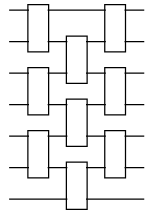

In [10]:
c3 = RandomCircuitCode((7,), Val(:brickwork), 3, [1,3,7])
c3.circ

In [11]:
c3 |> parity_checks

- ZYXX___
- YZ_____
- _____X_
- __X_Z__

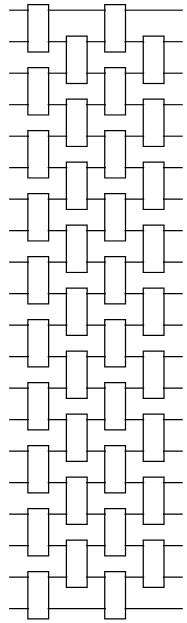

In [12]:
c4 = RandomCircuitCode((20,), Val(:brickwork), 4, 1:2:20)
c4.circ

In [13]:
c4 |> parity_checks

+ Z_YYX_______________
- __XX_ZY_____________
- __ZXX_XYZ___________
- ____XXZZZ___________
+ _____XZYYYXYX_______
- _________XXYY_X_____
- _________XX_Y_X_____
+ _______________ZXZZ_
+ ________________YZYX
+ __________________ZY

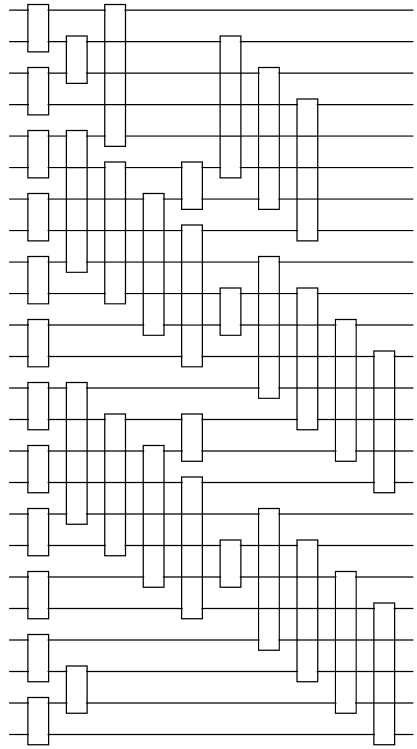

In [14]:
c5 = RandomCircuitCode((4,6), Val(:brickwork), 4, 1:10)
c5.circ

In [15]:
c5 |> parity_checks

+ _XZX_X_Y________________
- _XZ__X__________________
- _________ZX_XYZ_Z_Y_Y_X_
- _________________ZZ_ZYX_
- _________________Z___Y__
+ _________________Z_Y_Y_X
+ ________Y___Y_______Z___
- ________Y___Y_X__ZZ_ZYX_
+ _________Z_Y_Y___Z_Y_Y_X
- _________X_X_YXX_Z_Y_Y_X
- ________________YY__ZZX_
+ ________________XX__ZZX_
+ ______________________X_
- ___________________X___Z

# Decoding

Here, we test logical error rates 

In [16]:
using Random

In [17]:
Random.seed!(43)

TaskLocalRNG()

In [18]:
codes_test = [RandomCircuitCode((20,), Val(:brickwork), 500, [1]) for i  in 1:10];

In [23]:
noise = 0.001

setups = [
    CommutationCheckECCSetup(noise),
    NaiveSyndromeECCSetup(noise, 0),
    ShorSyndromeECCSetup(noise, 0),
]

for c in codes_test
    # @show c.arrange, c.connect
    for s in setups
        # @show s
        for d in [TableDecoder]
            e = evaluate_decoder(d(c), s, 100000)
            if max(e...) >= noise/4
                @info c.arrange, c.connect, max(e...), noise/4
            end
        end
    end
end

[ Info: ((20,), Val{:brickwork}(), 0.00026, 0.00025)
┌ Warning: Could not compactify the circuit, falling back to a slower version of the simulation. Consider reporting this issue to the package maintainers to improve performance. The offending gate was `ClassicalXOR{17}((86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102), 292)`.
└ @ QuantumClifford ~/Documents/Repos/QuantumClifford.jl/src/pauli_frames.jl:181
┌ Warning: Could not compactify the circuit, falling back to a slower version of the simulation. Consider reporting this issue to the package maintainers to improve performance. The offending gate was `ClassicalXOR{17}((86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102), 292)`.
└ @ QuantumClifford ~/Documents/Repos/QuantumClifford.jl/src/pauli_frames.jl:181
┌ Warning: Could not compactify the circuit, falling back to a slower version of the simulation. Consider reporting this issue to the package maintainers to improve performance. The offen

In [25]:
codes_test = [RandomCircuitCode((20,), Val(:brickwork), 1000, [1]) for i  in 1:5];

In [26]:
noise = 0.01

setups = [
    CommutationCheckECCSetup(noise),
    NaiveSyndromeECCSetup(noise, 0),
    ShorSyndromeECCSetup(noise, 0),
]

for c in codes_test
    # @show c.arrange, c.connect
    for s in setups
        # @show s
        for d in [PyMatchingDecoder]
            e = evaluate_decoder(d(c), s, 10000)
            if max(e...) >= noise/4
                @info c.arrange, c.connect, max(e...), noise/5
            end
        end
    end
end

LoadError: "Codes of type RandomCircuitCode do not have separate X and Z parity checks, either because they are not a CSS code and thus inherently do not have separate checks, or because its separate checks are not yet implemented in this library."

In [ ]:
x